
##**Hotel Cancellation Analysis and Prediction**

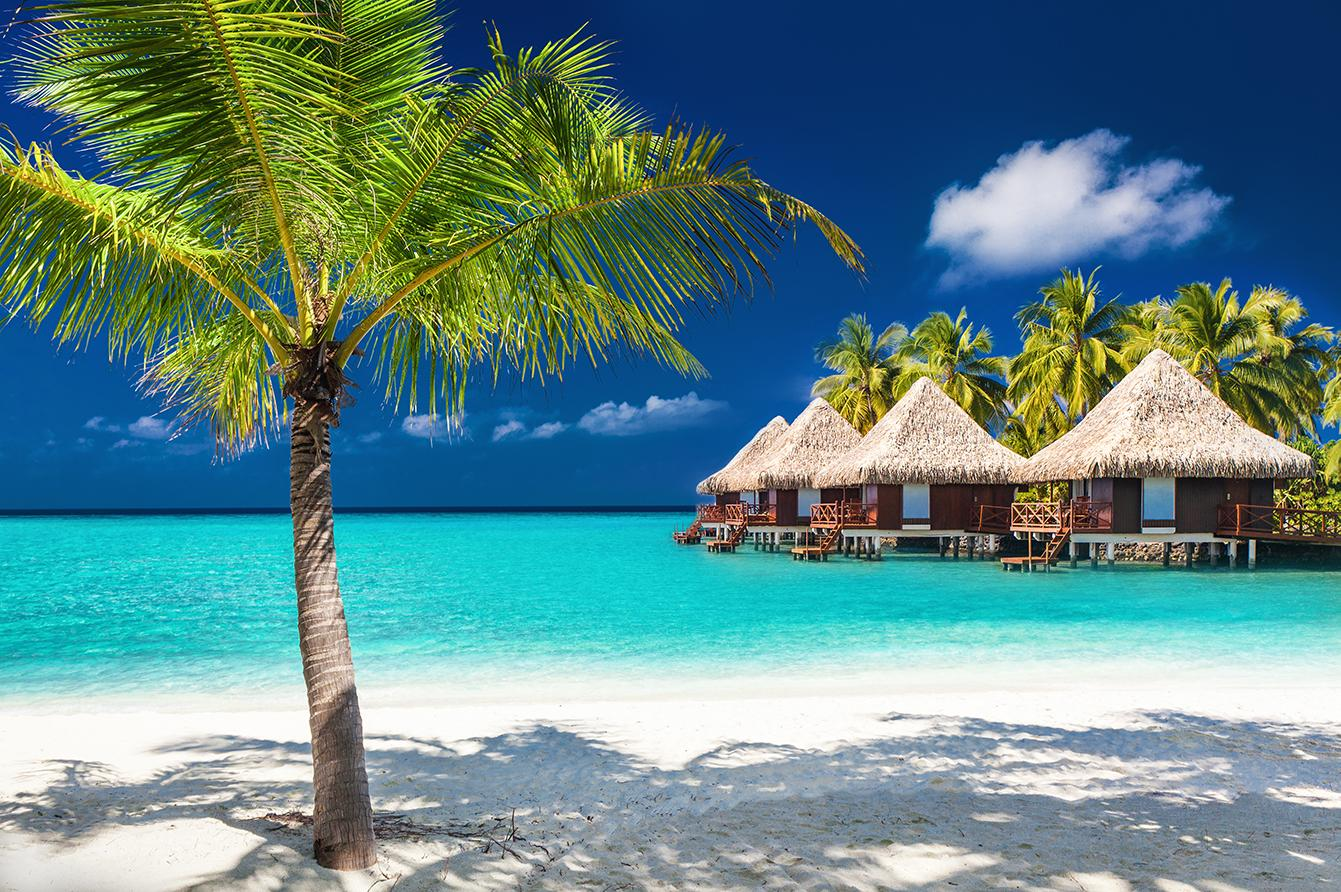



##**Business Problem**

The problem our client faces is the loss in revenue from uncertain booking cancellations. Therefore, we aim to predict whether the customer will cancel the booking or not and minimize the number of cancellations. In order to do so, we performed exploratory data analysis and built a prediction model using classification algorithms and picked the model with the highest accuracy.

##**Importing Data**

In [57]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import time
import datetime
import pickle

In [31]:
# Read the csv file
hotel_booking_data = pd.read_csv('/content/drive/MyDrive/Big Data Datasets/hotel_bookings.csv')
hotel_booking_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [32]:
# Extract resort and city hotel data
hotel_resort_data = hotel_booking_data[hotel_booking_data['hotel'] == 'Resort Hotel']
hotel_city_data = hotel_booking_data[hotel_booking_data['hotel'] == 'City Hotel']


##**Exploratory Data Analysis**

##Demand Inspection

In [66]:

# Extract the total country data
total_country_data =  hotel_booking_data['country'].value_counts().to_frame().reset_index()
total_country_data.rename(columns = {'index' : 'country', 'country' : 'guest_count'}, inplace=True)

# Extract the total country data with confirmed bookings
total_country_data_confirmed =  hotel_booking_data[hotel_booking_data['is_canceled'] == 0]['country'].value_counts().to_frame().reset_index()
total_country_data_confirmed.rename(columns = {'index' : 'country', 'country' : 'guest_count_confirmed'}, inplace=True)

# Extract the total country data with canceled bookings
total_country_data_canceled =  hotel_booking_data[hotel_booking_data['is_canceled'] == 1]['country'].value_counts().to_frame().reset_index()
total_country_data_canceled.rename(columns = {'index' : 'country', 'country' : 'guest_count_canceled'}, inplace=True)



fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

# 1 number of bookings by country
fig.add_trace(go.Pie(labels = total_country_data['country'].values.tolist(), 
                     values=total_country_data['guest_count'].values.tolist(), 
                     title = 'Total Bookings Across Countries'), 1, 1)

# 2.number of confirmed(non-cancelled) bookings by country
fig.add_trace(go.Pie(labels = total_country_data_confirmed['country'].values.tolist(), 
                     values=total_country_data_confirmed['guest_count_confirmed'].values.tolist(), 
                     title = 'Total Confirmed Bookings Across Countries'), 1, 2)

# 3. number of cancelled bookings by country
fig.add_trace(go.Pie(labels = total_country_data_canceled['country'].values.tolist(), 
                    values=total_country_data_canceled['guest_count_canceled'].values.tolist(), 
                    title = 'Total Canceled Bookings Across Countries'), 1, 3)
# Update the traces
fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))

In [69]:
# total bookings; choropleth map

# Plot the map
bookings_map = px.choropleth(total_country_data,
                             locations=total_country_data['country'],
                             color=total_country_data["guest_count"], 
                             hover_name=total_country_data["country"], 
                             color_continuous_scale=px.colors.sequential.Plasma,
                             title="Total Bookings Across Countries")
bookings_map.show()

In [70]:
# Create a feature called arrival data

#--> Map the name of the months with their corresponding numbers
def map_months(x):

  if x == 'January':
    x = 1
  elif x == 'February':
    x = 2
  elif x == 'March':
    x = 3
  elif x == 'April':
    x = 4
  elif x == 'May':
    x = 5
  elif x == 'June':
    x = 6
  elif x == 'July':
    x = 7
  elif x == 'August':
    x = 8
  elif x == 'September':
    x = 9
  elif x == 'October':
    x = 10
  elif x == 'November':
    x = 11
  elif x == 'December':
    x = 12
  return x

# Use the above mapping to create a new feature
hotel_booking_data['arrival_date_month_number'] = hotel_booking_data['arrival_date_month'].apply(lambda x : map_months(x))
hotel_booking_data['arrival_date'] = hotel_booking_data['arrival_date_day_of_month'].astype('str') + '/' + hotel_booking_data['arrival_date_month_number'].astype('str') + '/'+ hotel_booking_data['arrival_date_year'].astype('str')

In [71]:
# Convert into datetime variable
hotel_booking_data['arrival_date'] = pd.to_datetime(hotel_booking_data['arrival_date'])

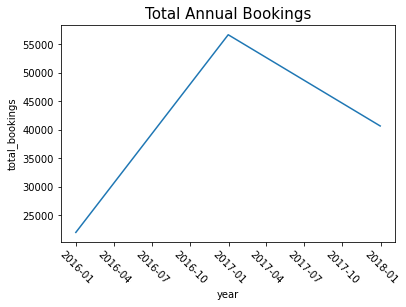

In [72]:
# Extract the total number of bookings for both the hotel types
bookings_by_date = hotel_booking_data['arrival_date'].value_counts().to_frame()
bookings_per_year = bookings_by_date.resample('y').sum().reset_index().rename(columns = {'index' : 'year', 'arrival_date': 'total_bookings'})

# Plot a line chart to visualise the total annual bookings
sns.lineplot(data = bookings_per_year, x = 'year', y = 'total_bookings')
plt.xticks(rotation = -45)
plt.title('Total Annual Bookings', fontdict = {'fontsize' : 15})
plt.show()

##Customer Behavior

###*What percentage of bookings are canceled between 2015-2017, does the percentage vary by season and year?*

Text(0.5, 0, '0 : Not Canceled, 1 : Canceled')

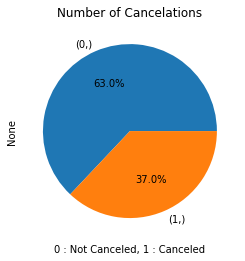

In [33]:
#Visualize total cancellations

ax = hotel_booking_data[['is_canceled']].value_counts().plot(kind='pie',autopct="%1.1f%%")
ax.set_title('Number of Cancelations')
ax.set_xlabel('0 : Not Canceled, 1 : Canceled')

Text(0.5, 0, '0 : Not Canceled, 1 : Canceled')

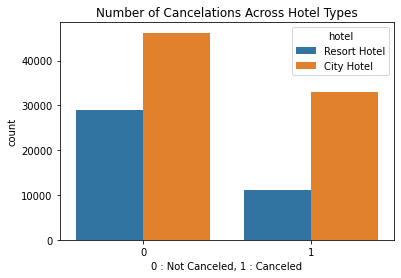

In [34]:
#Number of cancelations across hotel types


ax = sns.countplot(data= hotel_booking_data, x='is_canceled', hue='hotel')
ax.set_title('Number of Cancelations Across Hotel Types')
ax.set_xlabel('0 : Not Canceled, 1 : Canceled')


#fig.show()

​​Overall, 37% of bookings are cancelled. This is 13% higher than the industry rate. The shape of the distribution of cancellation is the same across both hotels, but since city hotels hold a higher percentage of overall hotel demand as Sun has reported, the impact of their cancellation is more significant to our client. Furthermore, over 40% of city hotel bookings are canceled while only 30% of resort hotel bookings are. Therefore we will focus on minimizing the number of cancellations for city hotels.

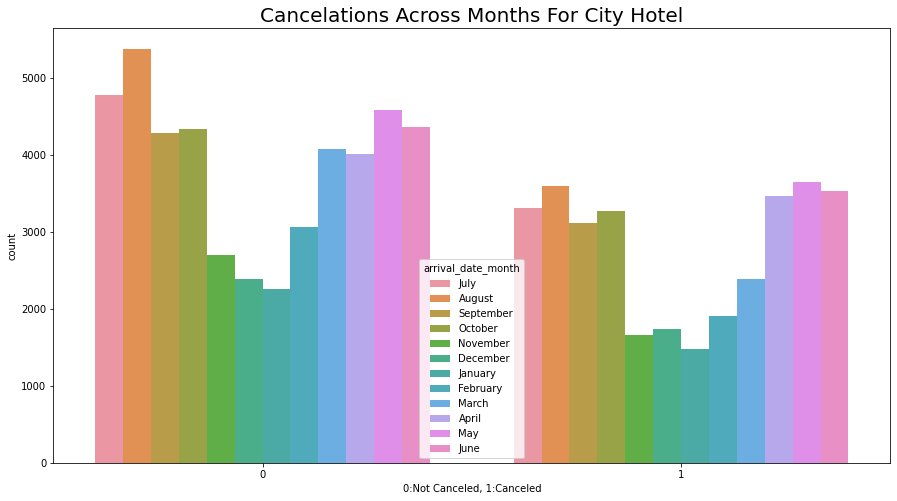

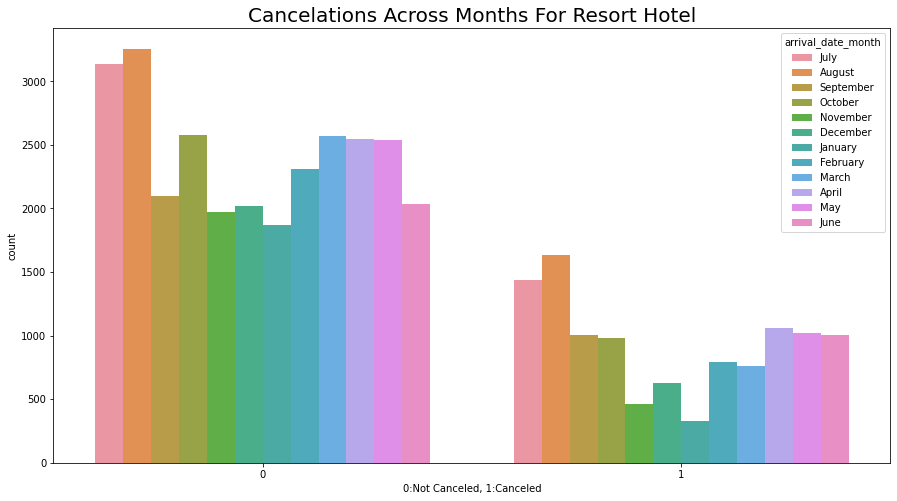

In [35]:
# Cancelation across months for City Hotel
plt.figure(figsize=(15,8))
sns.countplot(data=hotel_city_data, x='is_canceled', hue='arrival_date_month')
plt.xlabel('0:Not Canceled, 1:Canceled')
plt.title("Cancelations Across Months For City Hotel", fontdict={'fontsize':20})
plt.show()

# Cancelation across months for City Hotel
plt.figure(figsize=(15,8))
sns.countplot(data=hotel_resort_data, x='is_canceled', hue='arrival_date_month')
plt.xlabel('0:Not Canceled, 1:Canceled')
plt.title("Cancelations Across Months For Resort Hotel", fontdict={'fontsize':20})
plt.show()

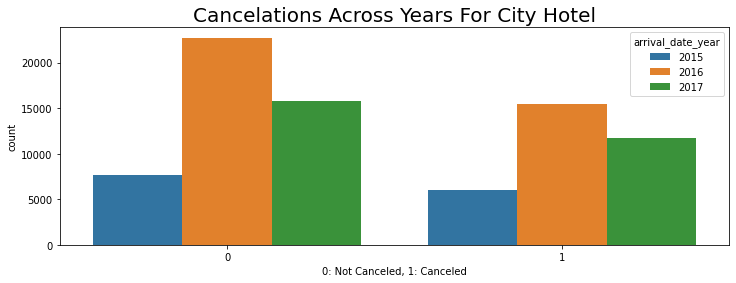

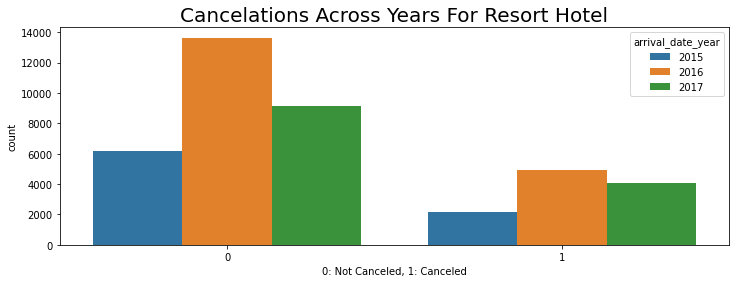

In [37]:
# Cancelation across city hotel for every year
plt.figure(figsize=(12,4))
sns.countplot(data=hotel_city_data, x='is_canceled', hue='arrival_date_year')
plt.title('Cancelations Across Years For City Hotel', fontdict={'fontsize':20})
plt.xlabel('0: Not Canceled, 1: Canceled')
plt.show()

# Cancelation across resort hotel for every year
plt.figure(figsize=(12,4))
sns.countplot(data=hotel_resort_data, x='is_canceled', hue='arrival_date_year')
plt.title('Cancelations Across Years For Resort Hotel', fontdict={'fontsize':20})
plt.xlabel('0: Not Canceled, 1: Canceled')
plt.show()

Next, we examine the distribution of cancellations across years. Overall number of bookings peaked in 2016, then decreased to a higher value than where we first started off at. Both types of hotels show the same distribution of cancellation. This confirms our initial suspicion that the number of cancellations is directly proportional to the number of bookings. Referring back shortly to yearly number of bookings, after cross-referencing our findings with real world data, we found out that the peak in 2016 was a result of an industry wide, the tourism industry, growth. This was due to exchange rates, oil prices and natural man-made crises in many parts of the world, which are all external factors not related to the quality of service provided by hotels. This leads us to the hypothesis that the number of bookings, which is directly proportional to the number of cancellations, is not influenced by the quality of service provided by hotels. 


###*Which type of guest has the highest probability of canceling between the period of the data, does the percentage vary by year?*

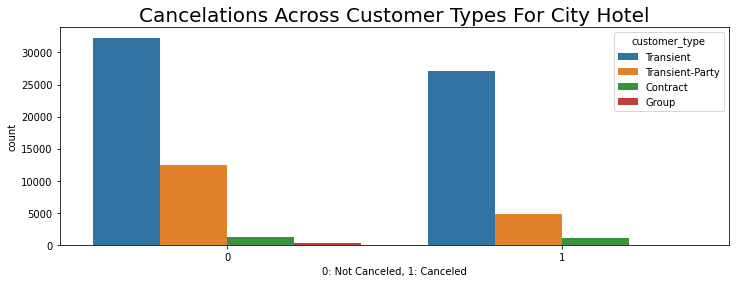

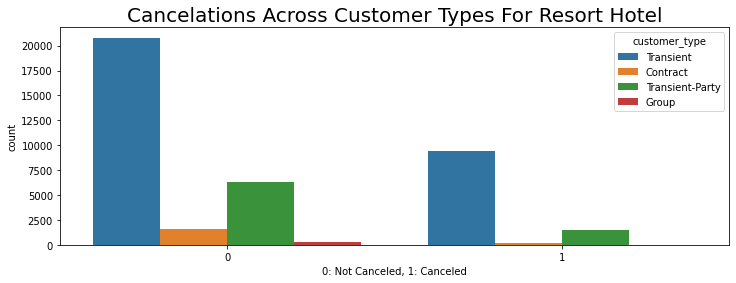

In [36]:
# Cancelation across city hotel for each customer type
plt.figure(figsize=(12,4))
sns.countplot(data=hotel_city_data, x='is_canceled', hue='customer_type')
plt.title('Cancelations Across Customer Types For City Hotel', fontdict={'fontsize':20})
plt.xlabel('0: Not Canceled, 1: Canceled')
plt.show()

# Cancelation across resort hotel for each customer type
plt.figure(figsize=(12,4))
sns.countplot(data=hotel_resort_data, x='is_canceled', hue='customer_type')
plt.title('Cancelations Across Customer Types For Resort Hotel', fontdict={'fontsize':20})
plt.xlabel('0: Not Canceled, 1: Canceled')
plt.show()

Transient customers are most likely to cancel for both city and resort hotels. Transient clients’ do not plan their trips beforehand, their critical decision making factor is the availability of the hotel at any given time. Therefore this supports our earlier hypothesis that clients do not cancel based on the quality of service provided by the hotel. The only incentive left for us to work with is deposit. To successfully minimize cancellation from transient guests, we need the next hypothesis to be true. That is ‘transient cancellations can be reduced by monetary dissuasions’. Or in other words, guests are deterred from cancelling by non-refundable deposits.

##*Other Investigations*

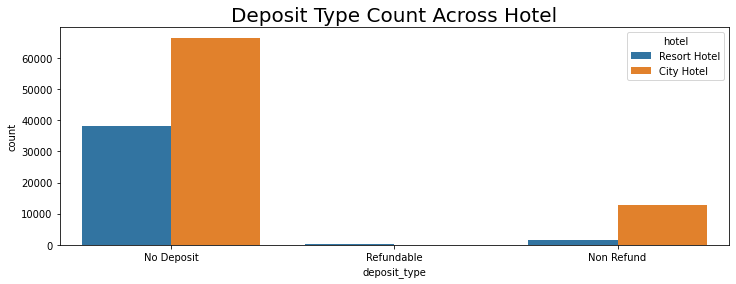

In [38]:
#Visualise the deposit_type across hotel 
plt.figure(figsize=(12, 4))
sns.countplot(data=hotel_booking_data, x = 'deposit_type', hue='hotel')
plt.title('Deposit Type Count Across Hotel', fontdict={'fontsize' : 20})
plt.show()

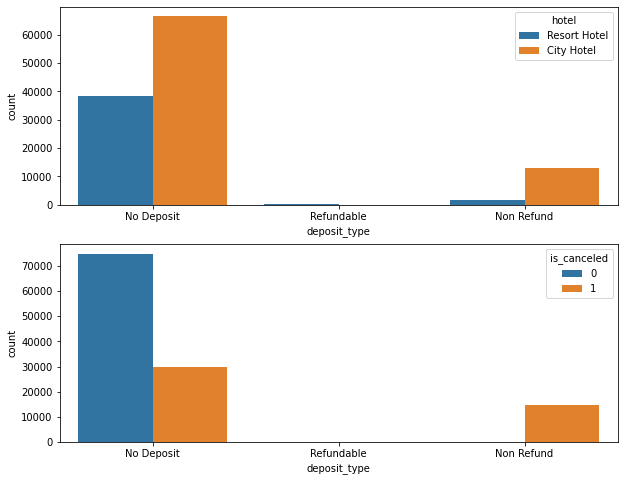

In [39]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = hotel_booking_data, hue = 'hotel', ax = ax[0])
sns.countplot(x = 'deposit_type', data = hotel_booking_data, hue = 'is_canceled', ax = ax[1])
plt.show()

The number of cancellations decreases by 53.3% when the deposit is non-refundable compared to when there is no deposit. This confirms our hypothesis that guests are deterred from cancelling by non-refundable deposit. The first hypothesis ‘the number of cancellations is not influenced by the quality of service provided by hotels’ will be investigated by examining hotels’ fulfillment of clients’ expectations.

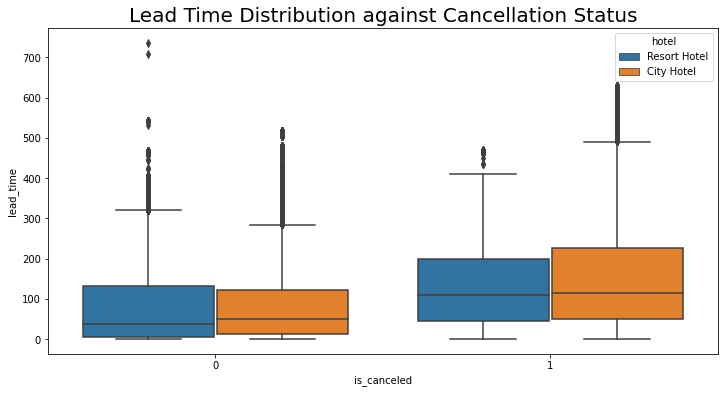

In [44]:
# visualising lead time across cancelled across hotels
plt.figure(figsize=(12,6))
sns.boxplot(data=hotel_booking_data, x = 'is_canceled', y = 'lead_time', hue = 'hotel') #resort hotel
plt.title("Lead Time Distribution against Cancellation Status", fontdict = {'fontsize' : 20})
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
#plt.ylim(0,200)
plt.show()

In [40]:
hotel_booking_data.groupby(['country'])['is_canceled'].agg( np.mean).sort_values(ascending = False).head(30)

country
KHM    1.000000
UMI    1.000000
NIC    1.000000
MYT    1.000000
JEY    1.000000
IMN    1.000000
HND    1.000000
GLP    1.000000
FJI    1.000000
GGY    1.000000
BEN    1.000000
VGB    1.000000
MAC    0.937500
HKG    0.896552
TJK    0.888889
ARE    0.843137
BHR    0.800000
FRO    0.800000
MDV    0.750000
BGD    0.750000
QAT    0.733333
SEN    0.727273
AND    0.714286
SAU    0.687500
IDN    0.685714
GEO    0.681818
PAK    0.642857
PHL    0.625000
NGA    0.617647
GIB    0.611111
Name: is_canceled, dtype: float64

##Fulfillment of Guests' Expectations

Used as a proxy for hotel performance

###*To what extent are guests affected by wrongly assigned rooms?*

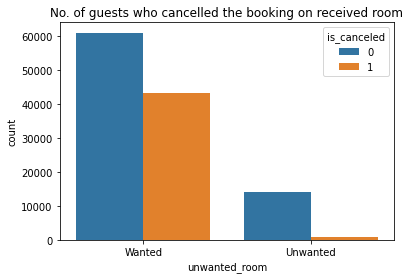

In [41]:
df= hotel_booking_data
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')
df['unwanted_room'] = unwanted_room
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled')
plt.title("No. of guests who cancelled the booking on received room")
plt.show()

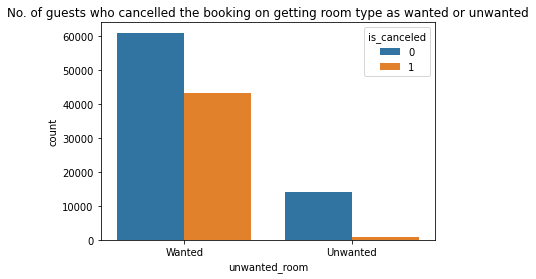

In [42]:
sns.countplot(x = 'unwanted_room', data = hotel_booking_data, hue = 'is_canceled')
plt.title("No. of guests who cancelled the booking on getting room type as wanted or unwanted")
plt.show()

The number of correctly assigned rooms can be interpreted as a proxy for hotel quality of service. A wanted room refers to guests receiving the same type of room as they requested. Looking at the results, bookings are 90 times more likely to be cancelled when the room is wanted. It does not make sense to say that the quality of service is inversely proportional to the number of retained bookings. Therefore, it is safe to conclude that the quality of service does not influence the cancellation rate. We accept the first hypothesis. Looking at the two accepted hypotheses, we can see that within the given data, guests are only really influenced by price. Therefore we come up with a new hypothesis, that is: ‘guests are the most sensitive to price out of all other factors.’ To investigate this, we must build a cancellation prediction model, and rank the feature importance to see which attributes are the most detrimental to a customer’s decision to cancel a booking.

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,unwanted_room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wanted
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wanted
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Unwanted
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Wanted
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Wanted


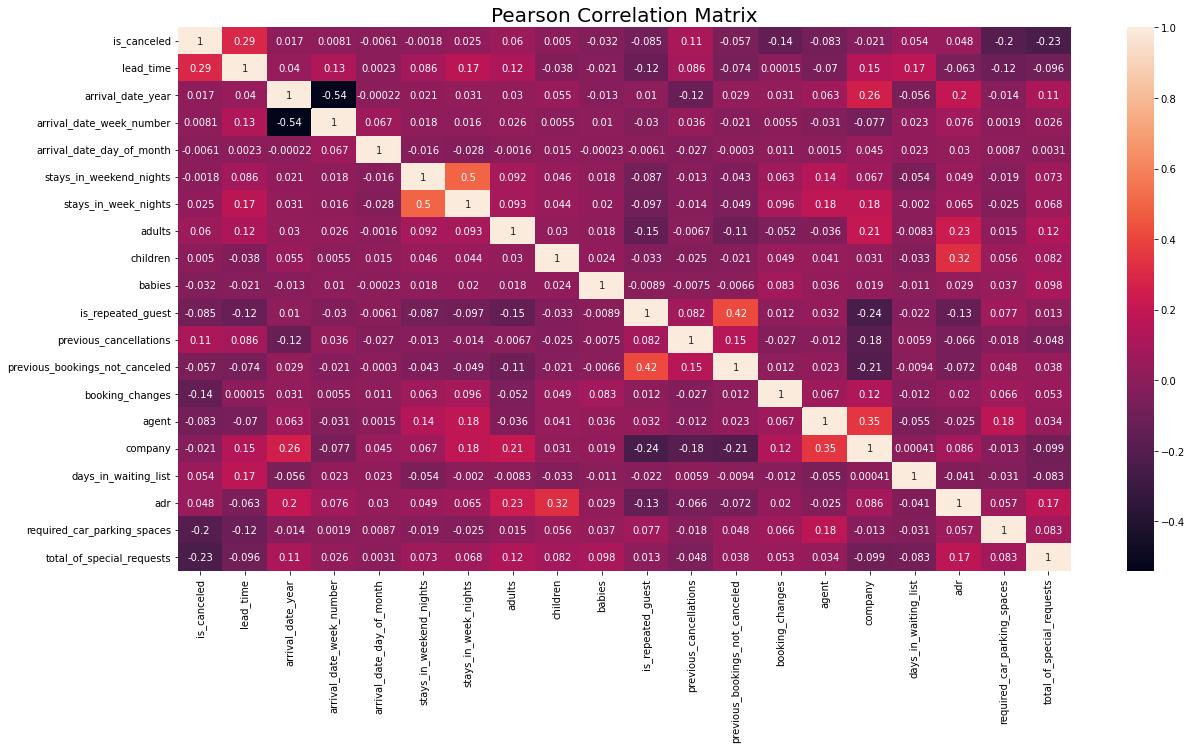

In [45]:
# Plot the correlation heatmap
corr_matrix = hotel_booking_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linecolor='black', )
plt.title("Pearson Correlation Matrix", fontdict={'fontsize':20})
plt.show()


##Preprocessing

In [46]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [47]:
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
#df['country'] = df['country'].fillna('PRT')
df = df.drop('company', axis = 1)

In [48]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [49]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [50]:
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926
unwanted_room 2


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [52]:
a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
unwanted_room 2


In [53]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

##Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)

##Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model

We use two classification algorithms suitable for predicting a binary response. Logistic regression uses a generalized linear equation to describe the directed dependencies among a set of variables, while random forest averages many decision trees together. A number of statistical assumptions must be met for logit regression while none is needed for random forest, allowing it to handle multicollinearity. Both models are sensitive to overfitting and outliers.

In [58]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8176843398386241
Confusion Matrix : 
[[21483  1109]
 [ 5421  7804]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     22592
           1       0.88      0.59      0.71     13225

    accuracy                           0.82     35817
   macro avg       0.84      0.77      0.79     35817
weighted avg       0.83      0.82      0.81     35817



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



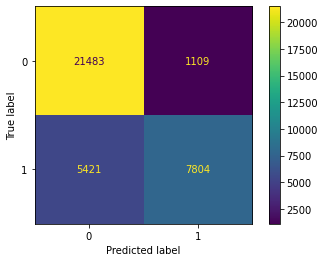

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [60]:
#Random Forest Classifier
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

y_pred_rdf = rdf.predict(X_test)

acc_rdf = accuracy_score(y_test, y_pred_rdf)
conf = confusion_matrix(y_test, y_pred_rdf)
clf_report = classification_report(y_test, y_pred_rdf)

print(f"Accuracy Score of Random Forest is : {acc_rdf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9530111399614708
Confusion Matrix : 
[[22365   227]
 [ 1456 11769]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22592
           1       0.98      0.89      0.93     13225

    accuracy                           0.95     35817
   macro avg       0.96      0.94      0.95     35817
weighted avg       0.95      0.95      0.95     35817



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



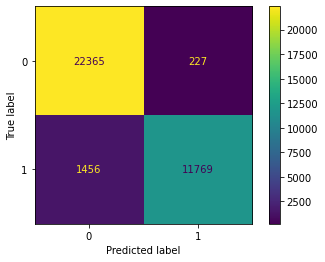

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rdf, X_test, y_test)

In [62]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree Classifier'],
    'Score' : [acc_lr , acc_rdf]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.953011
0,Logistic Regression,0.817684


In [63]:
import plotly.express as px
px.bar(models, x = 'Score', y = 'Model', orientation='h', color = 'Score', title = 'Models Comparison')

In [64]:
pd.DataFrame(index = X.columns, data = rdf.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
deposit_type,0.139975
arrival_date_week_number,0.106439
lead_time,0.101815
month,0.085574
day,0.078010
arrival_date_day_of_month,0.063982
adr,0.057901
total_of_special_requests,0.049590
previous_cancellations,0.042394
agent,0.039028


Random tree classifier achieved the accuracy of 95.5% while logistic regression achieved an accuracy of 81.7%.

From feature importance ranking, the most important feature is ‘deposit_type’. This also proves our last hypothesis that guests are most sensitive to price out of all factors.

##**Conclusion**

From performing EDA on the data and investigating our data driven questions, we came up with the following hypotheses:

1. The number of cancellations is not influenced by the quality of service provided by hotels.

2. Guests are deterred from cancelling by non-refundable deposits.

3. Guests are the most sensitive to price out of all the factors.

With further inspection we have enough evidence to accept all of the hypotheses. From these findings, we would suggest hotels set a non-refundable deposit or other types of monetary penalty to minimize the number of cancellations. As for the problem faced by our client, revenue loss from uncertain cancellations, we have constructed a model to predict whether a booking will get cancelled or not with a 95.5% accuracy rate. We believe that our solutions can effectively solve our client’s problems.
